# This notebook serves as an introduction to the `analysis.core.data` class

I will cover: 

1. Structure
2. Functions and Attributes
3. Grouped Data

In [2]:
from ekpy import analysis

import numpy as np

## 1. Structure

The `data` class can be most easily thought of as a class of nested dicts.

To understand why, we must understand the motivation. The most important motivator is that we wish to have a easy way of accessing data, and its associated meta data, quickly. Let's envision how we might do this using dicts:

In [3]:
# define data
x = np.arange(0,11,1)
y = x**2

# dict holding our data
data_dict = {'x':x, 'y':y}

# define associated meta data (some fake meta data variable, concentration)
meta_data_dict = {'concentration':{50}}

We want to group `data_dict` and `meta_data_dict` together to associate them with one another. A straightforward way to do so is by grouping them in (another) dict, let's call it `data_definition_dict` since it combines the data_dict and definition (meta_data)

In [42]:
data_definition_dict = {'data':data_dict, 'definition':meta_data_dict}

Now, imagine we have many such data_definition dicts, we need to keep them separate, so let's simply give it an index (0) in yet another dict (called `_dict`)

In [43]:
_dict = {0: data_definition_dict}

`_dict` is the basic form of the `Data` class. It can be thought of as nested dicts, which holds a collection of a bunch of `data_definition_dict`, which can be accessed by a unique index. Let's turn `_dict` into an instance of `Data` 

In [44]:
data = analysis.Data(_dict)

In [45]:
# data consists of a single key (0) which holds data and definition as defined above
data

{0: {'data': {'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100], dtype=int32)},
     'definition': {'concentration': {50}}}}

In [46]:
# since data has only one index, we can return the data_dict easily
data.data

{'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'y': array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100], dtype=int32)}

In [47]:
# and similar for the definition dict
data.definition

{'concentration': {50}}

In [48]:
# let's add some more data
x = np.arange(0,11,1)
# ^3 instead of ^2 as done previously 
y = x**3

# dict holding our data
data_dict_2 = {'x':x, 'y':y}

# new concentration
meta_data_dict_2 = {'concentration':{20}}
data_definition_dict_2 = {'data':data_dict_2, 'definition':meta_data_dict_2}

In [49]:
_dict = {0: data_definition_dict, 1: data_definition_dict_2}
data = analysis.Data(_dict)

In [50]:
# now if we look at data.data, since we now have two indices, we will return a dict of <index, data_dict>
data.data

{0: {'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
  'y': array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100], dtype=int32)},
 1: {'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
  'y': array([   0,    1,    8,   27,   64,  125,  216,  343,  512,  729, 1000],
        dtype=int32)}}

In [51]:
data.definition

{0: {'concentration': {50}}, 1: {'concentration': {20}}}

## 2. Functions and Attributes

In [84]:
_dict = {0: data_definition_dict, 1: data_definition_dict_2}
data = analysis.Data(_dict)

### Summarizing data with `.summary`

In [85]:
data.summary

{'concentration': {20, 50}}

### We can access specific indices using `.iloc`

In [52]:
data.iloc[0]

{0: {'data': {'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
              'y': array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100], dtype=int32)},
     'definition': {'concentration': {50}}}}

In [53]:
# get the data_dict for the first index
data.iloc[0].data

{'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'y': array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100], dtype=int32)}

In [54]:
# get the definition_dict for the first index
data.iloc[0].definition

{'concentration': {50}}

### Plotting using `.plot`

- Plot real data
- Each index will be it's own color in the plot, unless otherwise specified

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

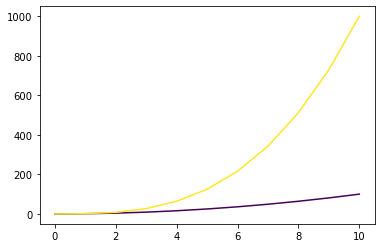

In [56]:
data.plot(x='x')

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

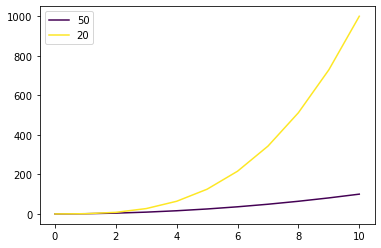

In [57]:
data.plot(x='x', labelby='concentration')

### Operating on data using `.apply`

`Data.apply(func)` will pass the data_dict corresponding to each index to `func`. `func` must return a `dict` corresponding to a data_dict

In [59]:
# define a function that takes a data_dict with keys 'x' and 'y' and takes the derivative of y with respect to 'x'
# returns a dict with a two keys 'x' and 'grady' corresponding to 'x' and derivative of y
def func(data_dict) -> 'dict':
    x, y = data_dict['x'], data_dict['y']
    grady = np.gradient(y, x)
    return {'x': x, 'grady':grady}

Let's run func on a specific data_dict (the data dict of index 0 in our data)

In [61]:
# get the first index data_dict
data_dict = data.iloc[0].data
func(data_dict)

{'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'grady': array([ 1.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 19.])}

In [62]:
# now we can apply this function using .apply!
data.iloc[0].apply(func)

{0: {'data': {'grady': array([ 1.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 19.]),
              'x': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
     'definition': {'concentration': {50}}}}

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

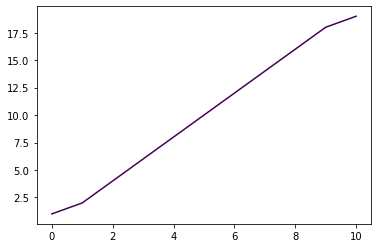

In [64]:
# plotting
data.iloc[0].apply(func).plot(x='x')

# (recall derivative of x^2 is linear)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

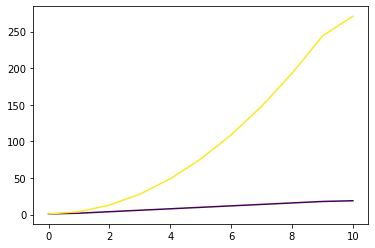

In [66]:
# apply to all indices in data and plot
data.apply(func).plot(x='x')

##### kwargs

You may want to pass kwargs to `func` in `data.apply`. These are passed directly in the `.apply` call

In [67]:
# a function that raises our data to a specified power
def power(data_dict, power)->'dict':
    return {'x': x, 'y_power':data_dict['y']**power}

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

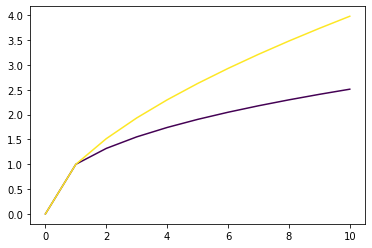

In [70]:
data.apply(power, power=0.2).plot(x='x')

##### Using definition (meta data) values in your function in `.apply`

You may wish to pass a definition (meta data) value to your function. These are passed as kwargs as follows:

- **Note**: when defining the function to be used in `.apply`, ensure it has kwarg corresponding to the required definition key.
- **Note**: definition_dicts consist of <key:set>, meaning the value in the key, value pair is of type `set` (this is done so that you can easily group data). You will likely want to implement some sort of check to ensure you pass the correct number of values when performing `.apply` (see comment in `conc_add` below.
- **Bonus Note**: it is generally a good idea, to allow for such functions to deal with arbitrary kwargs (*i.e.,* `**kwargs` in the definition declaration) in case the definition dict contains many keys

In [79]:
# a function that adds the 10x'concentration' value to 'y'

def conc_add(data_dict, concentration:'set', **kwargs) -> 'dict':
    # 'concentration' will be passed from the definition_dict and will therefore be a set
    # ensure that the kwarg 'concentration' has only one element in the set.
    
    if len(concentration)!=1:
        raise ValueError('More than one concentration passed from definition')
    
    # convert concentration to a number by taking the first element of the set
    concentration = list(concentration)[0]
    
    return {'x':data_dict['x'], 'y':data_dict['y']+10*concentration}

- To pass definition, use the kwarg `pass_defn=True` in `.apply`

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

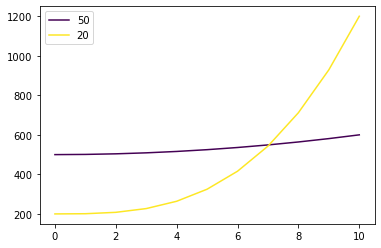

In [81]:
data.apply(conc_add, pass_defn=True).plot(x='x', labelby='concentration')

### 3. Grouped data

- Grouped data allows you to group by defition

Let's see how this changes the structure. I will create a `Data` class with three indices to start, two correspond two trails of a 'concentration' of 10 and one trial with a 'concentration' of 20

##### Structure

In [3]:
_dict = {
    0: {
        'data':{'x':np.array([0,0,0])},
        'definition':{'concentration':{10}, 'trial':{0}} 
    },
    
    1: {
        'data':{'x':np.array([1,1,1])},
        'definition':{'concentration':{10}, 'trial':{1}}
    },
    
    2: {
        'data':{'x':np.array([2,2,2])},
        'definition':{'concentration':{20}, 'trial':{0}}
    }
}
data = analysis.Data(_dict)

In [4]:
# looking at the definition_dict alone we see we have three indices
data.definition

{0: {'concentration': {10}, 'trial': {0}},
 1: {'concentration': {10}, 'trial': {1}},
 2: {'concentration': {20}, 'trial': {0}}}

Group the data on concentration

In [5]:
# we next group on concentration which will effectively combine trials 0 and 1 for concentration of 10.
# how does the definition dict change?
grouped_data = data.groupby('concentration')
grouped_data.definition

{0: {'concentration': {10}, 'trial': {0, 1}},
 1: {'concentration': {20}, 'trial': {0}}}

Now there are only two indices, and index 0 has two trials in it

What about the data_dict?

In [6]:
grouped_data.data

{0: {'x': array([[0, 0, 0],
         [1, 1, 1]])},
 1: {'x': array([2, 2, 2])}}

You'll notice that now index 0 has a stack of data corresponding to the different trials

#### Plotting and operating on grouped data

1. Plotting
 - Each data array in the stack for each index is plotted independently from the others data arrays, though all data corresponding to the same definition is colored the same color

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

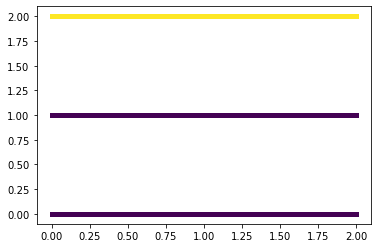

In [7]:
grouped_data.plot(y='x', linewidth=5)

2. Averaging across grouped data (`.mean()`)

Now that we have two trials grouped together, we may want to take the average. We can do this by using `.mean()`: 

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

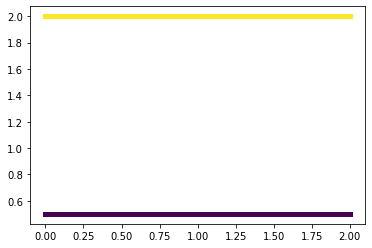

In [8]:
grouped_data.mean().plot(y='x', linewidth=5)

You'll notice that now we have only two lines, as opposed to three, since the grouped data is now averaged across trials

**more fun with `.mean`**

In [13]:
# average across trials (default behavior)
grouped_data.mean(across_trials=True)

{0: {'data': {'x': array([0.5, 0.5, 0.5])},
     'definition': {'concentration': {10}, 'trial': {0, 1}}},
 1: {'data': {'x': array([2, 2, 2])},
     'definition': {'concentration': {20}, 'trial': {0}}}}

In [14]:
# average with trials
grouped_data.mean(across_trials=False)

{0: {'data': {'x': array([[0.],
       [1.]])},
     'definition': {'concentration': {10}, 'trial': {0, 1}}},
 1: {'data': {'x': 2.0}, 'definition': {'concentration': {20}, 'trial': {0}}}}

#### `.apply` on grouped data

The default behavior appears identical to before. Each trial, *i.e.,* each data array in the data stack will be operated on independent of the other data arrays with which it is grouped

In [29]:
# define a function to add 0.5 to 'x'
def add(data_dict):
    return {'x':data_dict['x']+0.5}

<AxesSubplot:>

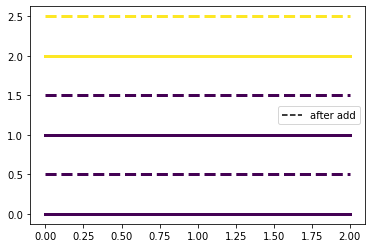

In [30]:
# plot before .apply(add)
fig, ax = grouped_data.plot(linewidth=3)

# plot dashed line after add
grouped_data.apply(add).plot(linestyle='dashed', linewidth=3, ax=ax)

from ekpy.analysis import plotting
plotting.add_legend_element(ax, 'after add', color='black', linestyle='dashed')

If one wishes to operate on a grouped data stack, and do so on the entire stack at once (as opposed to operating on each "row" in the stack sequentiall), this can be achieved by using 

```python
data.apply(<some function>, pass_trials_iteratively=False) 
```